<a href="https://colab.research.google.com/github/dev-sayantan/MainFlow-Data-Science-Internship/blob/main/student_analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA SCIENCE WITH PYTHON TASK 01 - STUDENT PERFORMANCE DATA ANALYSIS**

This notebook is dedicated to analyzing student performance data. The analysis will involve several steps, including data loading, exploration, cleaning, and visualization, to gain insights into factors that might influence student grades.

## **REQUIRED LIBRARY IMPORTS**

This cell imports all the necessary Python libraries for data analysis and visualization.

-   `pandas` is imported as `pd` for data manipulation and analysis.
-   `numpy` is imported as `np` for numerical operations.
-   `matplotlib.pyplot` is imported as `plt` for creating static plots.
-   `seaborn` is imported as `sns` for creating aesthetically pleasing statistical graphics.

In [2]:
# REQUIRED IMPORTS - PYTHON DATA ANALYSIS & VISUALIZATION LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **DATA EXTRACTION, LOADING, VIEWING**

This section handles the process of getting the data from its source into a usable format within the notebook.

This cell uses the `zipfile` module to extract a specific file (`student-mat.csv`) from a zip archive located in Google Drive. The extracted file is saved to a specified directory within the same Google Drive folder structure.

This cell reads the extracted `student-mat.csv` file into a pandas DataFrame named `extracted_stumat`. The `sep=';'` argument is used because the data in the CSV is separated by semicolons instead of the default commas. The entire DataFrame is then printed to the console to display its contents and get an initial look at the data.

In [4]:
# IMPORT PYTHON'S zipfile MODULE TO EXTRACT SPECIFIC FILE FROM ZIP ARCHIVE
from zipfile import ZipFile

# EXTRACTING PROCESS :-
# OPEN THE ZIP FILE
with ZipFile('/content/drive/MyDrive/Colab Notebooks/MainFlow_DataSc_Internship/Dataset/student.zip') as zObject:
# SPECIFIC FILE EXTRACTION(student-mat.csv) FROM ZIP ARCHIVE TO "Extracted"
  # FOLDER
  zObject.extract('student-mat.csv', path='/content/drive/MyDrive/Colab Notebooks/MainFlow_DataSc_Internship/Dataset/Extracted')

In [13]:
# LOAD AND RUN THE DATASET
extracted_stumat = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MainFlow_DataSc_Internship/Dataset/Extracted/student-mat.csv',sep=';')

Displaying the first few records of `extracted_stumat` DataFrame using `.head()` function. The output shows the number of rows and columns in the DataFrame, providing first `10` records which we can change as per our wish.

In [14]:
# First 10 rows/records of the data
print(f"First few records are displayed here:\n {extracted_stumat.head(10)}")

First few records are displayed here:
   school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4   at_home   teacher   
1     GP   F   17       U     GT3       T     1     1   at_home     other   
2     GP   F   15       U     LE3       T     1     1   at_home     other   
3     GP   F   15       U     GT3       T     4     2    health  services   
4     GP   F   16       U     GT3       T     3     3     other     other   
5     GP   M   16       U     LE3       T     4     3  services     other   
6     GP   M   16       U     LE3       T     2     2     other     other   
7     GP   F   17       U     GT3       A     4     4     other   teacher   
8     GP   M   15       U     LE3       A     3     2  services     other   
9     GP   M   15       U     GT3       T     3     4     other     other   

   ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0  ...      4        3      4     1     1

## **DATA EXPLORATION AND BASIC DATA CLEANING**

This section focuses on understanding the structure and quality of the data and performing initial cleaning steps.

The cell below, prints the shape of the `extracted_stumat` DataFrame using the `.shape` attribute. The output shows the number of rows and columns in the DataFrame, providing a quick overview of the dataset's size.

In [15]:
# CHECKING SHAPE OF THE DATAFRAME
print(f"Shape of DataFrame: {extracted_stumat.shape}")

Shape of DataFrame: (395, 33)


The cell below checks for missing values in the DataFrame.
-   `extracted_stumat.isnull()` creates a boolean DataFrame of the same shape as the original, where `True` indicates a missing value (NaN) and `False` indicates a non-missing value.
-   `extracted_stumat.isnull().sum()` calculates the sum of missing values for each column. A sum of 0 for a column means there are no missing values in that column.
- The output shows that there are no missing values in this dataset.

In [17]:
# CHECKING / IDENTIFYING ALL MISSING VALUES, IF ANY, PRESENT IN THE DATAFRAME "extracted_stumat"
missing_values = extracted_stumat.isnull()
missing_value_count = extracted_stumat.isnull().sum()
print(missing_values)
print(missing_value_count)

     school    sex    age  address  famsize  Pstatus   Medu   Fedu   Mjob  \
0     False  False  False    False    False    False  False  False  False   
1     False  False  False    False    False    False  False  False  False   
2     False  False  False    False    False    False  False  False  False   
3     False  False  False    False    False    False  False  False  False   
4     False  False  False    False    False    False  False  False  False   
..      ...    ...    ...      ...      ...      ...    ...    ...    ...   
390   False  False  False    False    False    False  False  False  False   
391   False  False  False    False    False    False  False  False  False   
392   False  False  False    False    False    False  False  False  False   
393   False  False  False    False    False    False  False  False  False   
394   False  False  False    False    False    False  False  False  False   

      Fjob  ...  famrel  freetime  goout   Dalc   Walc  health  absences  \

Since there are no missing values present in the dataset, as we saw in the previous cell, no operations needed to handle missing values of the DataFrame.

The cell below, prints the data types of each column in the `extracted_stumat` DataFrame using the `.dtypes` attribute. This helps identify whether columns are numeric, object (strings), or other types, which is important for subsequent analysis and visualization steps.

In [18]:
# EXPLORING FURTHER :- CHECKING DATATYPE OF THE DATAFRAME & ALSO FOR ALL FEATURES/COLUMNS
print(extracted_stumat.dtypes)

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


The cell below, checks for and removes duplicate rows from the DataFrame.
-   `extracted_stumat.drop_duplicates(keep=False)` creates a new DataFrame `extracted_uniqueVal_stumat` where any row that is an exact duplicate of another row is removed. `keep=False` means all occurrences of a duplicate row are removed.
-   The new DataFrame `extracted_uniqueVal_stumat` is then printed.

In [19]:
# REMOVING DUPLICATE VALUES PRESENT IN THE DATAFRAME
extracted_uniqueVal_stumat = extracted_stumat.drop_duplicates(keep=False)
extracted_uniqueVal_stumat

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


The cell below, explicitly checks if any duplicate values were found and removed by comparing the shape of the original DataFrame (`extracted_stumat`) with the shape of the DataFrame after attempting to remove duplicates (`extracted_uniqueVal_stumat`). If the shapes are the same, it means no duplicate rows were present. If they are different, it would indicate that duplicates were found and dropped, and the boolean DataFrame indicating the duplicate rows would be printed.

In [20]:
# CHECKING THE SHAPE OF THE DATAFRAME TO CONFIRM THAT THERE ARE NO DUPLICATE VALUES PRESENT IN THE DATASET
if extracted_stumat.shape == extracted_uniqueVal_stumat.shape:
  print("No Duplicate Values Found")
else:
  print("Duplicate Values Found :\n", extracted_stumat.duplicated(keep=False))

No Duplicate Values Found


## **DESCRIPTIVE STATISTICS SUMMARY**

This section generates a summary of the descriptive statistics for the numerical columns in the dataset.

The cell below, calculates and displays the descriptive statistics for the numerical columns of the `extracted_stumat` DataFrame using the `.describe()` method. The resulting DataFrame `extracted_stumat_descrStat` includes counts, mean, standard deviation, minimum, maximum, and quartile values for each numerical column. This provides a quick summary of the distribution and central tendencies of the numerical data.

In [21]:
extracted_stumat_descrStat = extracted_stumat.describe()
extracted_stumat_descrStat

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


## **ANALYSIS QUESTIONS**

This section addresses specific questions about the student performance data using the cleaned and explored dataset.

#### **AVERAGE FINAL GRADE (G3)**

This subsection calculates the average final grade (G3) of the students.

The cell below calculates the average final grade (G3) using two methods:
1.  Accessing the 'mean' row and 'G3' column from the `extracted_stumat_descrStat` DataFrame using `.loc[]`.
2.  Directly calculating the mean of the 'G3' column in the original `extracted_stumat` DataFrame using the `.mean()` method.

Both methods are used to demonstrate different ways to obtain the same result and confirm the average final grade.

In [22]:
# AVERAGE FINAL GRADE(G3) :-
# METHOD ONE -->
print("Average Final Grade(G3) [From Descriptive Statistics Table Obtained From DataFrame]:", extracted_stumat_descrStat.loc['mean', 'G3'])
# METHOD TWO -->
print("Average Final Grade(G3) [From The Cleaned DataFrame, After Performing Missing & Duplicate Values Removal]:", extracted_stumat['G3'].mean())

Average Final Grade(G3) [From Descriptive Statistics Table Obtained From DataFrame]: 10.415189873417722
Average Final Grade(G3) [From The Cleaned DataFrame, After Performing Missing & Duplicate Values Removal]: 10.415189873417722


##### **Analysis Outcome with Explanation -->**

The analysis performed in the previous code cell was to calculate the average final grade (G3). It clarifies the two methods used (using the descriptive statistics table and directly on the column) and states the resulting average final grade. I have calculated in two methods using two different DataFrames,
* First one obtained after generating descriptive statistics and applying pandas accessor .loc[] used for selecting data from a DataFrame by its labels (the row and column names), specifically used for label-based indexing and selection.
* The second method is about filtering a required part of the DataFrame, based on specific required feature/column name. The average final grade obtained by using the Pandas mean() function to compute the arithmetic mean (average) of data within a Series or DataFrame.
> Average Final Grade(G3) = 10.41

#### HOW MANY STUDENTS SCORED ABOVE 15?

This subsection determines the number of students who achieved a final grade (G3) greater than 15.

The cell below simply prints the `extracted_stumat` DataFrame just to get a proper view of the it, showing the data being used for the calculation in the subsequent cell.

In [23]:
extracted_stumat

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


The cell below calculates the total number of students who scored above 15 in their final grade (G3).
-   `extracted_stumat['G3'] > 15` creates a boolean Series where `True` indicates a G3 score greater than 15.
-   `extracted_stumat[extracted_stumat['G3'] > 15]` filters the DataFrame to include only rows where the G3 score is greater than 15.
-   `.value_counts()` counts the occurrences of each unique row in the filtered DataFrame.
-   `.sum()` sums the counts from `value_counts()`, effectively giving the total number of rows (students) that met the condition.

The result, the total count of students with a G3 above 15, is then printed.

In [24]:
stu_G3_Above15_totalCount = extracted_stumat[extracted_stumat['G3'] > 15].value_counts().sum()
print("Number of Students Who Scored Above 15 are:", stu_G3_Above15_totalCount)

Number of Students Who Scored Above 15 are: 40


##### **Analysis Outcome with Explanation -->**
It describes the filtering process using boolean indexing and the use of `value_counts().sum()` to get the total count. The final count is also stated. By performing BOOLEAN INDEXING to FILTER the DATAFRAME to obtain only those students who got above 15, then by using value_counts() function, returning a SERIES per distint row, containing the frequency/occurance of students having more than 15, within the DATAFRAME & finally using sum() to aggregate the frequencies/occurances.
> There are 40 students who scored above 15, including both male and female stduents

#### IS studytime CORRELATED WITH performance?

This subsection investigates the correlation between the amount of time a student studies and their final performance (G3).

This cell below calculates and displays the correlation between 'studytime' and 'G3'.
-   `print(extracted_stumat.columns)` displays all column names to ensure the correct column names are used.
-   `print(extracted_stumat.corr(numeric_only=True))` calculates and prints the pairwise correlation matrix for all numerical columns, showing the correlation coefficient between every pair of numerical features.
-   `print("Correlation Coefficient value, between two features/columns: 'studytime' & 'G3' is =", extracted_stumat['studytime'].corr(extracted_stumat['G3']))` specifically calculates and prints the correlation coefficient between the 'studytime' and 'G3' columns.

This provides both a broad view of correlations and the specific correlation of interest.

In [25]:
print(extracted_stumat.columns)

print(extracted_stumat.corr(numeric_only=True), '\n')

print("Correlation Coefficient value, between two features/columns: 'studytime' & 'G3' is =", extracted_stumat['studytime'].corr(extracted_stumat['G3']))

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')
                 age      Medu      Fedu  traveltime  studytime  failures  \
age         1.000000 -0.163658 -0.163438    0.070641  -0.004140  0.243665   
Medu       -0.163658  1.000000  0.623455   -0.171639   0.064944 -0.236680   
Fedu       -0.163438  0.623455  1.000000   -0.158194  -0.009175 -0.250408   
traveltime  0.070641 -0.171639 -0.158194    1.000000  -0.100909  0.092239   
studytime  -0.004140  0.064944 -0.009175   -0.100909   1.000000 -0.173563   
failures    0.243665 -0.236680 -0.250408    0.092239  -0.173563  1.000000   
famrel      0.053940 -0.003914 -0.001370   -0.016808   0.039731 -0.044337   

##### **Analysis Outcome with Explanation** -->
The above cell explains the process of checking the correlation between 'studytime' and 'G3'. It mentions the correlation matrix and the specific correlation coefficient calculated between features with only numeric datatypes, ignoring the non-numeric datatypes. It also provides an interpretation of the correlation coefficient value, indicating the strength and direction of the linear relationship between the two variables. After checking all the column names, printing correlation matrix having correlation coefficient values, then checking correlation between the two columns only - 'studytime' & 'G3', indicating that it has a very low/weak positive correlation between them, 0.0978

#### WHICH GENDER PERFORMS BETTER ON AVERAGE?

This subsection compares the average final grades (G3) between male and female students to determine which gender performs better on average.

The cell below, calculates and displays the average final grade (G3) for each gender.
-   `gender_count = extracted_stumat['sex'].value_counts()` counts the number of students for each gender ('F' and 'M') and stores it in `gender_count`. This count is then printed.
-   `extracted_stumat['G3'].groupby(extracted_stumat['sex']).mean()` groups the DataFrame by the 'sex' column and then calculates the mean of the 'G3' column for each gender group. The resulting Series, showing the average G3 for each gender, is then printed.

This allows for a direct comparison of average performance between male and female students.

In [26]:
gender_count = extracted_stumat['sex'].value_counts()
print(gender_count)
extracted_stumat['G3'].groupby(extracted_stumat['sex']).mean()

sex
F    208
M    187
Name: count, dtype: int64


,G3
sex,
F,9.966346
M,10.914439


##### **Analysis Outcome with Explanation -->**

This markdown cell summarizes the findings from the previous code cell regarding the average final grades by gender. It states the average G3 for both male and female students and concludes which gender performs better on average based on these values. So, above output is clearly showing that 187 Male students are having average final grade(G3) of 10.9, and thus performs better than 208 Female students who secured 9.96 as average final grade(G3).

## **VISUALIZATION**

This section uses various plotting libraries to visualize key aspects of the data, making the findings easier to understand and interpret.

#### HISTOGRAM OF GRADES

This subsection visualizes the distribution of the final grades (G3) using histograms.

This cell generates a histogram of the 'G3' column using the `matplotlib.pyplot` library.
-   `plt.figure(figsize=(8, 5))` sets the size of the plot.
-   `plt.hist(extracted_stumat['G3'], bins=10, color='skyblue', edgecolor='black')` creates the histogram with 10 bins, skyblue bars, and black edges.
-   `plt.title()`, `plt.xlabel()`, and `plt.ylabel()` set the title and axis labels.
-   `plt.show()` displays the plot.

This histogram provides a visual representation of how the final grades are distributed.

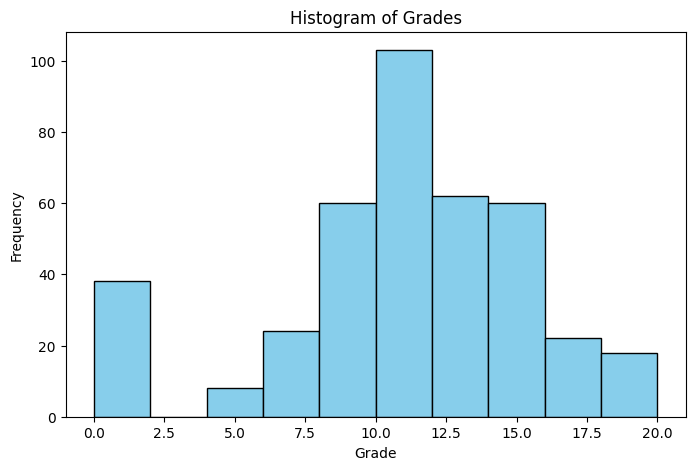

In [27]:
# USING MATPLOTLIB LIBRARY FOR VISUALIZATION
plt.figure(figsize=(8, 5))
plt.hist(extracted_stumat['G3'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Grades')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.show()

This cell generates a histogram of the 'G3' column using the `seaborn` library.
-   `sns.histplot(extracted_stumat['G3'], bins=10, kde=True, color='skyblue')` creates the histogram with 10 bins, a Kernel Density Estimate (KDE) line, and skyblue bars. The KDE line provides a smoothed representation of the distribution.
-   `plt.title()`, `plt.xlabel()`, and `plt.ylabel()` set the title and axis labels.
-   `plt.show()` displays the plot.

Seaborn's histogram often has a more refined appearance and the option to include a KDE plot.

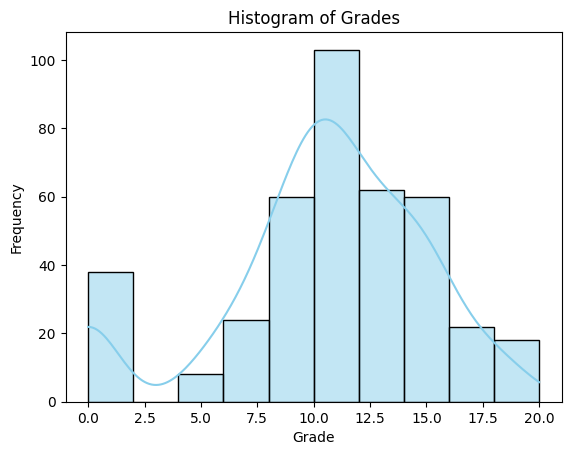

In [28]:
# USING SEABORN LIBRARY FOR VISUALIZATION
sns.histplot(extracted_stumat['G3'], bins=10, kde=True, color='skyblue')
plt.title('Histogram of Grades')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.show()

#### SCATTERPLOT : STUDYTIME Vs GRADE

This subsection visualizes the relationship between 'studytime' and 'G3' using scatterplots.

This cell generates a scatterplot of 'studytime' vs 'G3' using the `seaborn` library.
-   `sns.scatterplot(x='studytime', y='G3', data=extracted_stumat)` creates the scatterplot with 'studytime' on the x-axis and 'G3' on the y-axis, using the `extracted_stumat` DataFrame.
-   `plt.title()`, `plt.xlabel()`, and `plt.ylabel()` set the title and axis labels.
-   `plt.show()` displays the plot.

This scatterplot helps visualize any potential linear relationship between study time and final grade.

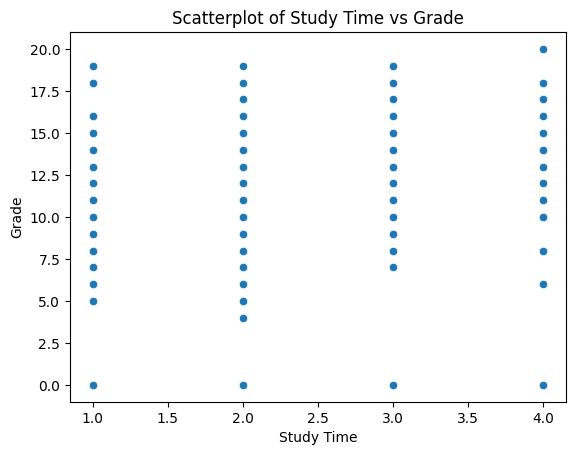

In [29]:
# USING SEABORN
sns.scatterplot(x='studytime', y='G3', data=extracted_stumat)
plt.title('Scatterplot of Study Time vs Grade')
plt.xlabel('Study Time')
plt.ylabel('Grade')
plt.show()

This cell generates a scatterplot of 'studytime' vs 'G3' using the `matplotlib.pyplot` library.
-   `plt.figure(figsize=(8, 5))` sets the size of the plot.
-   `plt.scatter(extracted_stumat['studytime'], extracted_stumat['G3'], alpha=0.5)` creates the scatterplot with 'studytime' on the x-axis and 'G3' on the y-axis. `alpha=0.5` makes the points semi-transparent, which is useful if there are many overlapping points.
-   `plt.title()`, `plt.xlabel()`, and `plt.ylabel()` set the title and axis labels.
-   `plt.show()` displays the plot.

This provides another visual representation of the relationship between study time and final grade using a different library.

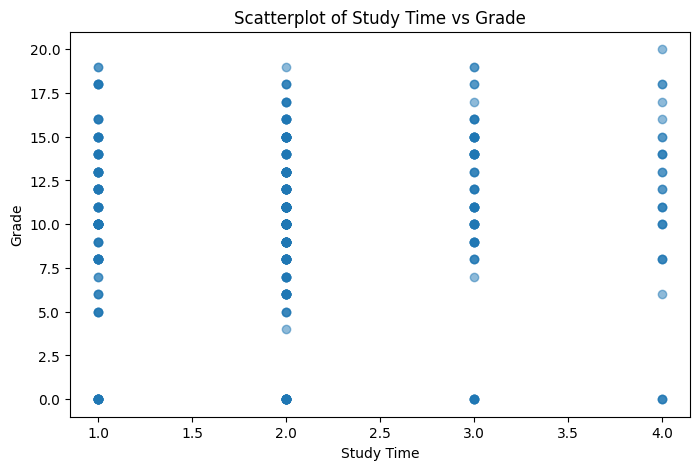

In [30]:
# USING MATPLOTLIB
plt.figure(figsize=(8, 5))
plt.scatter(extracted_stumat['studytime'], extracted_stumat['G3'], alpha=0.5)
plt.title('Scatterplot of Study Time vs Grade')
plt.xlabel('Study Time')
plt.ylabel('Grade')
plt.show()

#### BAR CHART : MALE Vs FEMALE AVERAGE SCORE

This subsection visualizes the comparison of average final grades between male and female students using bar charts.

This cell generates a bar chart comparing the average final grades (G3) of male and female students using the `matplotlib.pyplot` library.
-   `extracted_stumat['G3'].groupby(extracted_stumat['sex']).mean()` calculates the average G3 for each gender.
-   `.plot(kind='bar', color=['skyblue', 'lightcoral'])` creates a bar chart from the resulting Series, with specified colors for the bars.
-   `plt.title()`, `plt.xlabel()`, and `plt.ylabel()` set the title and axis labels.
-   `plt.xticks(rotation=0)` sets the rotation of the x-axis labels to 0 degrees for better readability.
-   `plt.show()` displays the plot.

This bar chart provides a clear visual comparison of the average performance by gender.

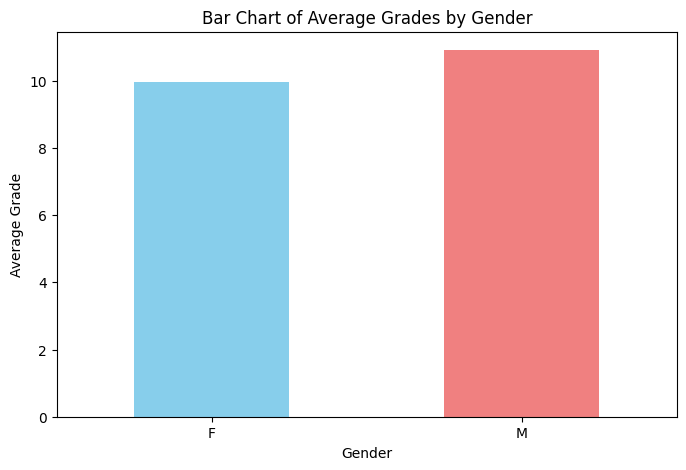

In [31]:
# USING MATPLOTLIB
plt.figure(figsize=(8, 5))
extracted_stumat['G3'].groupby(extracted_stumat['sex']).mean().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Bar Chart of Average Grades by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Grade')
plt.xticks(rotation=0)
plt.show()

In [32]:
final_extracted_stumat_analyzed = extracted_stumat.sort_values(by='G3', ascending=False)
final_extracted_stumat_analyzed

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
47,GP,M,16,U,GT3,T,4,3,health,services,...,4,2,2,1,1,2,4,19,19,20
286,GP,F,18,U,GT3,T,2,2,at_home,at_home,...,4,3,3,1,2,2,5,18,18,19
374,MS,F,18,R,LE3,T,4,4,other,other,...,5,4,4,1,1,1,0,19,18,19
110,GP,M,15,U,LE3,A,4,4,teacher,teacher,...,5,5,3,1,1,4,6,18,19,19
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,GP,M,18,U,GT3,T,4,4,teacher,services,...,4,3,3,2,2,2,0,10,10,0
343,GP,F,17,U,GT3,A,2,2,at_home,at_home,...,3,3,1,1,2,4,0,9,8,0
367,MS,F,17,R,GT3,T,1,1,other,services,...,5,2,1,1,2,1,0,7,6,0
389,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,0,6,5,0


The above cell sorts the `extracted_stumat` DataFrame by the 'G3' column in descending order.
- `extracted_stumat.sort_values(by='G3', ascending=False)` sorts the DataFrame based on the values in the 'G3' column. `ascending=False` ensures the sort is in descending order (highest grades first).
- The sorted DataFrame is then assigned to a new variable `final_extracted_stumat_analyzed`.
- The sorted DataFrame is then printed to display the result.

This sorting helps in easily identifying students with the highest and lowest final grades.

## **CONCLUSION**

This notebook successfully performed a preliminary analysis of the student performance data. Within it, I loaded, cleaned, and explored the dataset, calculated key metrics like average final grades, identified the number of students scoring above a certain threshold, and investigated the correlation between study time and performance. I also visualized the data distribution and gender-based performance using various plotting libraries.

The analysis revealed:
- The average final grade (G3) is approximately `10.4`.
- `40` students scored above `15` in their final grade.
- There is a very weak positive correlation between study time and final grade.
- Male students perform slightly better on average in their final grades compared to female students.



---

